In [1]:
 import numpy as np
 import pandas as pd
 import seaborn as sns

In [2]:
df=pd.read_csv('apy.csv',na_values='=')

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape

(188384, 7)

In [5]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
df.describe()

,Crop_Year,Area,Production
count,188384.000000,1.883830e+05,1.849850e+05
mean,2005.559559,1.156036e+04,7.217057e+05
std,4.891408,3.825555e+04,1.941815e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.700000e+01,9.500000e+01
50%,2005.000000,6.000000e+02,7.230000e+02
75%,2010.000000,4.300000e+03,6.779000e+03
max,2015.000000,1.020181e+06,1.250800e+09


In [7]:
df['Production']=pd.to_numeric(df['Production'])

In [8]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                1
Area                1
Production       3399
dtype: int64

In [9]:
df.dropna(inplace=True)


In [10]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [11]:
df_=df.groupby(['State_Name','Crop_Year']).sum()

In [12]:
df_.reset_index(inplace=True)

In [13]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [14]:
df_.groupby(['State_Name']).count()

,Crop_Year,Area,Production
State_Name,,,
Andaman and Nicobar Islands,8,8,8
Andhra Pradesh,18,18,18
Arunachal Pradesh,18,18,18
Assam,18,18,18
Bihar,18,18,18
Chandigarh,13,13,13
Chhattisgarh,15,15,15
Dadra and Nagar Haveli,17,17,17
Goa,12,12,12


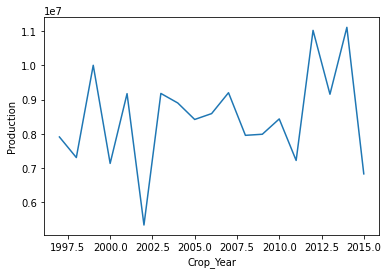

In [17]:
sns.lineplot(x='Crop_Year',y='Production',data=df_[df_['State_Name']=='Odisha'])

In [19]:
!pip3 install plotly_express

In [20]:
import plotly_express as px

In [21]:
 px.scatter(df_,x='Area',y='Production',animation_frame="Crop_Year",animation_group="State_Name",color="State_Name")

In [22]:
df_.sort_values('Crop_Year',inplace=True)

In [23]:
df_.head()

,State_Name,Crop_Year,Area,Production
300,Mizoram,1997,88067.0,150914.0
26,Arunachal Pradesh,1997,229118.0,267148.0
125,Goa,1997,35823.0,72538.0
153,Haryana,1997,5046500.0,20009400.0
385,Rajasthan,1997,16124400.0,18658350.0


In [27]:
df[(df.State_Name=="Kerala")&(df.Crop_Year==2000)].sort_values('Production')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [31]:
df_1=df[df.Crop.isin(['Rice','Wheat','Maize','Ragi'])].groupby(['State_Name','Crop_Year']).sum()

In [33]:
df_1.sort_values('Crop_Year',inplace=True)

In [40]:
df_1.reset_index(inplace=True)

In [41]:
px.scatter(df_1,x='Area',y='Production',animation_frame="Crop_Year",animation_group="State_Name",color="State_Name")

In [43]:
df_1['Efficiency']=df_1['Production']/df_1['Area']

In [45]:
px.scatter(df_1,x='Area',y='Efficiency',size="Production",animation_frame="Crop_Year",animation_group="State_Name",color="State_Name")